# TISEAN
### lyap_r for 500k datapoints
### Lyapunov_all_mV.sh
l=500000

m=4

d=5

s=50

./lyap_r ../SUBSTATES/160.txt -l$l -x10 -c2 -m$m -d$d -s$s -o test_160.dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def fit_TISEAN(m, d, inname, outname, potential = [-160,-140,-120,-100,-80,-60,-40,-20,20,40,60,80]):
    f_size =  14
    fig, ax = plt.subplots()#figsize=(5, 4)
    lyapunov=[]
    #potential = np.arange(-160,81,20)
    #if m==6:
    #    potential = [-160,-140,-120,-100,-80,-60,-40,-20,20,40,60,80]
    for mV in potential:
        if mV < 0:
            fname = inname + str(abs(mV)) + '.dat' # 500k datapoints
        elif mV ==0:
            fname = inname + 'zero.dat' # 500k datapoints
        else:
            fname = inname + '+' + str(mV) + '.dat' # 500k datapoints
        d20 = np.loadtxt(fname)
        x = d20[:,0]
        y = d20[:,1]
        model = np.polyfit(x[d-1:m*d], y[d-1:m*d], 1)
        predict = np.poly1d(model)
        lyapunov.append(model[0])
        plt.scatter(x,y, s=(0.1*72./fig.dpi)**2, marker="s")
        #plt.plot(x,y, label='-'+str(mV)+'mV', linewidth=0.1)
        plt.plot(x[d-1:m*d],predict(x[d-1:m*d]), linewidth=0.1, label=str(mV)+' mV')
    fig.suptitle('Rosenstein Algorithm\ndelay embedding m=%d, \u03C4=%d\n1 Million datapoints'%(m, d),  fontsize=f_size)
    ax.set_xlabel('$t_{evolve}$', fontsize=f_size)
    ax.set_ylabel('$S(t_{evolve})$', fontsize=f_size)
    ax.tick_params(axis='both', labelsize=f_size)
    ax.legend(prop={'size': 12},  bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    plt.tight_layout()
    fig.savefig('comparison/'+outname, bbox_inches='tight')
    plt.show()
    return lyapunov

In [3]:
def fit2_TISEAN(m, d, inname, outname):
    #larger fit region
    f_size =  14
    fig, ax = plt.subplots()#figsize=(5, 4)
    lyapunov=[]
    potential = np.arange(-160,81,20)
    if m==6:
        potential = [-160,-140,-120,-100,-80,-60,-40,-20,20,40,60,80]
    for mV in potential:
        if mV < 0:
            fname = inname + str(abs(mV)) + '.dat' # 500k datapoints
        elif mV ==0:
            fname = inname + 'zero.dat' # 500k datapoints
        else:
            fname = inname + '+' + str(mV) + '.dat' # 500k datapoints
        d20 = np.loadtxt(fname)
        x = d20[:,0]
        y = d20[:,1]
        model = np.polyfit(x[0:m*d], y[0:m*d], 1)
        predict = np.poly1d(model)
        lyapunov.append(model[0])
        plt.scatter(x,y, s=(0.1*72./fig.dpi)**2, marker="s")
        #plt.plot(x,y, label='-'+str(mV)+'mV', linewidth=0.1)
        plt.plot(x[0:m*d],predict(x[0:m*d]), linewidth=0.1, label=str(mV)+' mV')
    fig.suptitle('Rosenstein Algorithm\ndelay embedding m=%d, \u03C4=%d\n1 Million datapoints'%(m, d),  fontsize=f_size)
    ax.set_xlabel('$t_{evolve}$', fontsize=f_size)
    ax.set_ylabel('$S(t_{evolve})$', fontsize=f_size)
    ax.tick_params(axis='both', labelsize=f_size)
    ax.legend(prop={'size': 12},  bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    plt.tight_layout()
    fig.savefig('comparison/'+outname, bbox_inches='tight')
    plt.show()
    return lyapunov

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


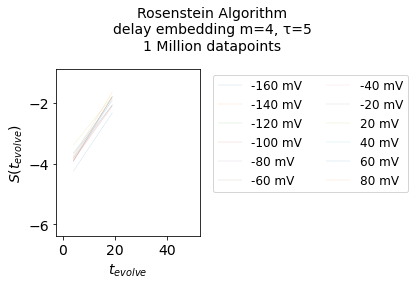

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


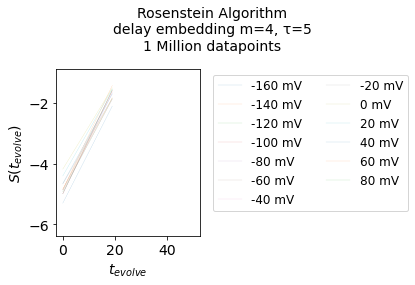

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


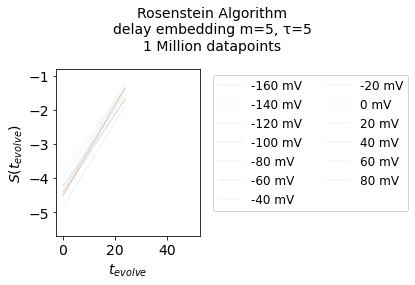

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


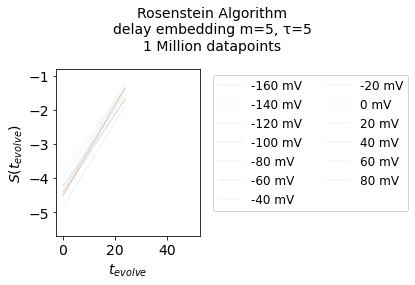

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


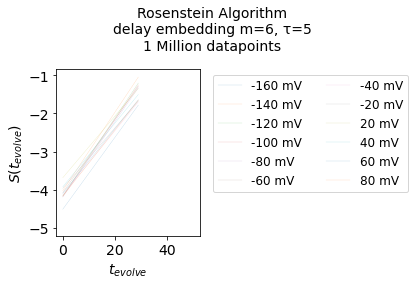

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


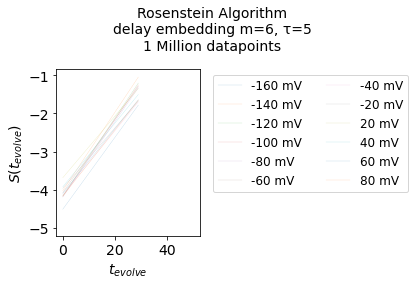

In [13]:
lyap_m4 = fit_TISEAN(m=4, d=5, inname='1e6data_', outname='Fit_m=4_m=5.eps')
lyap_m4_otherFit = fit2_TISEAN(m=4, d=5, inname='1e6data_', outname='larger_Fit_m=4_m=5.eps')
lyap_m5 = fit2_TISEAN(m=5, d=5, inname='dim_m=5/1e6data_', outname='m=5_m=5.eps')
lyap_m5_otherFit = fit2_TISEAN(m=5, d=5, inname='dim_m=5/1e6data_', outname='larger_Fit_m=5_m=5.eps')
lyap_m6 = fit2_TISEAN(m=6, d=5, inname='dim_m=6/1e6data_', outname='m=6_m=5.eps')
lyap_m6_otherFit = fit2_TISEAN(m=6, d=5, inname='dim_m=6/1e6data_', outname='larger_Fit_m=6_m=5.eps')

# Lyapunov exponent versus membrane potential

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


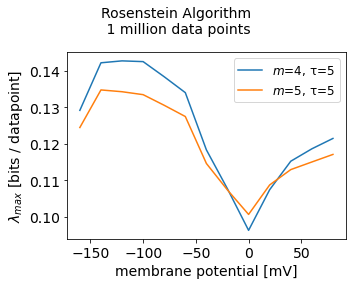

In [12]:
potential = np.arange(-160,81,20)

f_size =  14
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('Rosenstein Algorithm\n 1 million data points', fontsize=f_size)
plt.plot(potential, lyap_m4, label='$m$=4, \u03C4=5')
plt.plot(potential, lyap_m5, label='$m$=5, \u03C4=5')
#plt.plot( [-160,-140,-120,-100,-80,-60,-40,-20,20,40,60,80], lyap_m6, label='$m$=6, \u03C4=5')


ax.set_xlabel('membrane potential [mV]', fontsize=f_size)
ax.set_ylabel('$\lambda_{max}$ [bits / datapoint]', fontsize=f_size)
ax.tick_params(axis='both', labelsize=f_size)
ax.legend(prop={'size': 12})
fig.tight_layout()
fig.savefig('comparison/Rosentstein_Lyapunov_vs_mV.eps', bbox_inches='tight')
plt.show()

# Lyapunov exponents for wider fit region

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


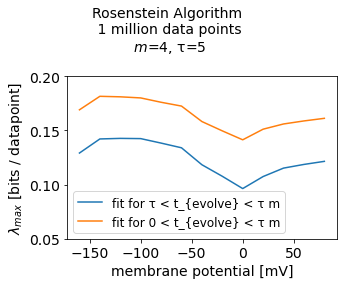

In [61]:
potential = np.arange(-160,81,20)

f_size =  14
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('Rosenstein Algorithm\n 1 million data points\n $m$=4, \u03C4=5', fontsize=f_size)
plt.plot(potential, lyap_m4, label='fit for \u03C4 < t_{evolve} < \u03C4 m')
plt.plot(potential, lyap_m4_otherFit , label='fit for 0 < t_{evolve} < \u03C4 m')

ax.set_xlabel('membrane potential [mV]', fontsize=f_size)
ax.set_ylabel('$\lambda_{max}$ [bits / datapoint]', fontsize=f_size)
ax.tick_params(axis='both', labelsize=f_size)
ax.set_ylim([0.05,0.2])
ax.legend(prop={'size': 12}) #bbox_to_anchor=(0.05, -0.2), loc='upper left'
fig.tight_layout()
fig.savefig('comparison/Rosentstein_Lyapunov_vs_mV_widerFit.eps', bbox_inches='tight')
plt.show()

## + and -  200mV

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


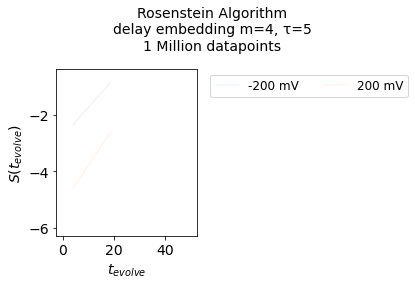

In [9]:
lyap_200 = fit_TISEAN(m=4, d=5, inname='5e5data_', outname='Fit_m=4_m=5_200mV.eps', potential = [-200, 200])

In [18]:
lyap_200

[0.10127904485294119, 0.13374428970588223]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


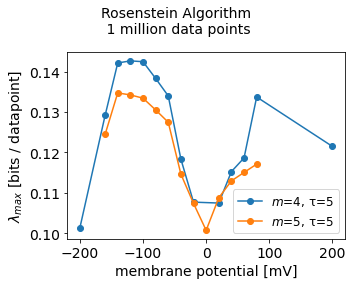

In [31]:
potential_m4 = [-200, -160,-140,-120,-100,-80,-60,-40,-20,20,40,60,80, 200]
potential_m5 = np.arange(-160,81,20)


bla = np.insert(lyap_m4,0, lyap_200[0] )
bla = np.insert(bla,len(bla)-1, lyap_200[1] )

f_size =  14
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('Rosenstein Algorithm\n 1 million data points', fontsize=f_size)
plt.plot(potential_m4, bla, '-o', label='$m$=4, \u03C4=5')
plt.plot(potential_m5, lyap_m5, '-o', label='$m$=5, \u03C4=5')
#plt.plot( [-160,-140,-120,-100,-80,-60,-40,-20,20,40,60,80], lyap_m6, label='$m$=6, \u03C4=5')


ax.set_xlabel('membrane potential [mV]', fontsize=f_size)
ax.set_ylabel('$\lambda_{max}$ [bits / datapoint]', fontsize=f_size)
ax.tick_params(axis='both', labelsize=f_size)
ax.legend(prop={'size': 12})
fig.tight_layout()
fig.savefig('comparison/Rosentstein_Lyapunov_vs_mV_200included.eps', bbox_inches='tight')
plt.show()

In [15]:
[lyap_200[0], lyap_m4, lyap_200[1]]

([0.10127904485294119,
  [0.12916311323529406,
   0.14216807647058813,
   0.1426919470588234,
   0.1424880735294117,
   0.1383470647058823,
   0.13400898382352924,
   0.11835761617647052,
   0.10769568382352933,
   0.10746862647058819,
   0.11525786911764699,
   0.11864982941176458,
   0.12148804264705863],
  0.13374428970588223],)

In [25]:
bla = np.insert(lyap_m4,0, lyap_200[0] )

In [26]:
bla = np.insert(lyap_m4,len(bla)-1, lyap_200[1] )

In [27]:
bla

array([0.12916311, 0.14216808, 0.14269195, 0.14248807, 0.13834706,
       0.13400898, 0.11835762, 0.10769568, 0.10746863, 0.11525787,
       0.11864983, 0.12148804, 0.13374429])